<a href="https://colab.research.google.com/github/gangakailas/ParallelComputing/blob/main/ParallelComputing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
QUESTION 1

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset from TensorFlow
(X, y), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (scale between 0 and 1)
X = X / 255.0
X_test = X_test / 255.0

# Flatten images (convert from 28x28 to 784 features)
X = X.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Apply one-hot encoding to labels
y = to_categorical(y, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Split dataset into training (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shapes
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training set: (48000, 784) (48000, 10)
Validation set: (12000, 784) (12000, 10)
Test set: (10000, 784) (10000, 10)


In [ ]:
QUESTION 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

# Load MNIST dataset from TensorFlow
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to [0,1]
X_train = X_train.reshape(-1, 28 * 28) / 255.0
X_test = X_test.reshape(-1, 28 * 28) / 255.0

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("✅ Data loaded and preprocessed!")
print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")


✅ Data loaded and preprocessed!
Train shape: (48000, 784), Validation shape: (12000, 784), Test shape: (10000, 784)


In [ ]:
# Train Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_val)

# Evaluate Performance
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9223
Precision: 0.9221
Recall: 0.9223
F1 Score: 0.9222

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1175
           1       0.95      0.97      0.96      1322
           2       0.90      0.90      0.90      1174
           3       0.91      0.89      0.90      1219
           4       0.93      0.94      0.94      1176
           5       0.89      0.89      0.89      1104
           6       0.95      0.95      0.95      1177
           7       0.94      0.93      0.93      1299
           8       0.90      0.87      0.88      1160
           9       0.90      0.91      0.90      1194

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000



In [ ]:
# Define parameter grid
param_grid = {'C': [0.1, 1, 10, 50, 100]}

# Perform Grid Search CV
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
                           param_grid, scoring='accuracy', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters
best_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Evaluate Best Model
y_pred_best = best_model.predict(X_val)
accuracy_best = accuracy_score(y_val, y_pred_best)
print(f"Improved Accuracy: {accuracy_best:.4f}")


Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Best Hyperparameters: {'C': 0.1}
Improved Accuracy: 0.9242


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


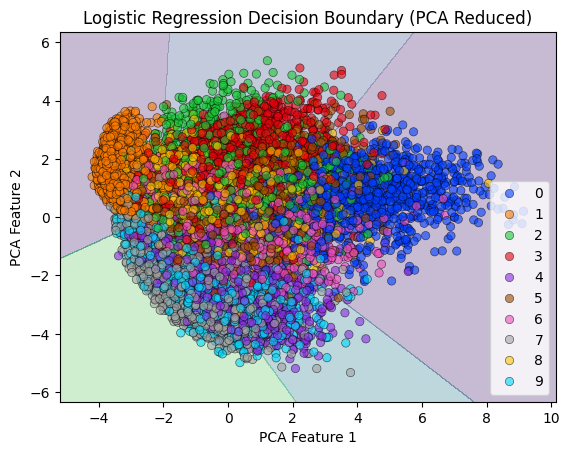

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce data to 2D
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_val_2D = pca.transform(X_val)

# Train logistic regression on 2D data
model_2D = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_2D.fit(X_train_2D, y_train)

# Plot decision boundary
def plot_decision_boundary(X, y, model):
    h = .02  # Step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="bright", alpha=0.6, edgecolor="k")
    plt.title("Logistic Regression Decision Boundary (PCA Reduced)")
    plt.xlabel("PCA Feature 1")
    plt.ylabel("PCA Feature 2")
    plt.show()

plot_decision_boundary(X_val_2D, y_val, model_2D)


In [ ]:
QUESTION 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("/content/sm/supermarket_sales - Sheet1.csv")

# Select relevant features (Numerical columns for clustering)
features = ["Unit price", "Quantity", "Tax 5%", "Total", "cogs", "gross margin percentage", "gross income"]
df_selected = df[features]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

print("✅ Data loaded and preprocessed!")


✅ Data loaded and preprocessed!


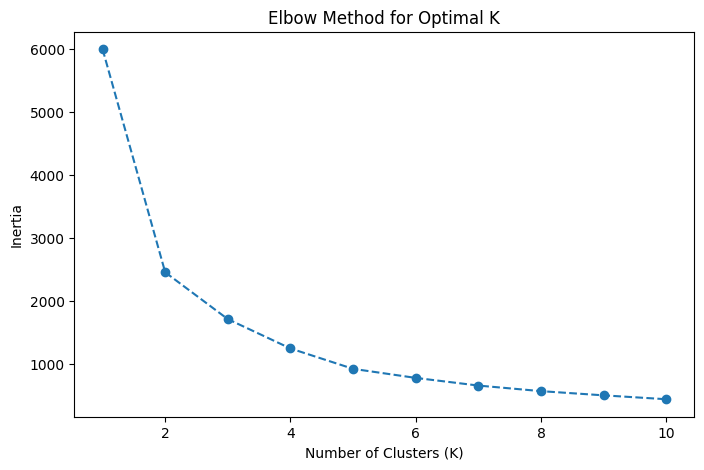

In [ ]:
# Find optimal clusters using Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [ ]:
# Apply K-Means with optimal K (e.g., 3 or 4 based on elbow method)
optimal_k = 4  # Adjust based on elbow method result
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Check cluster sizes
print(df["Cluster"].value_counts())


Cluster
0    333
2    268
3    234
1    165
Name: count, dtype: int64


In [ ]:
# Calculate average values for each cluster
cluster_summary = df.groupby("Cluster")[features].mean()
print(cluster_summary)


         Unit price  Quantity     Tax 5%       Total        cogs  \
Cluster                                                            
0         26.056607  4.882883   6.005956  126.125086  120.119129   
1         84.541697  8.684848  36.373145  763.836055  727.462909   
2         61.281866  7.048507  20.258662  425.431909  405.173246   
3         71.035726  2.401709   8.326902  174.864936  166.538034   

         gross margin percentage  gross income  
Cluster                                         
0                       4.761905      6.005956  
1                       4.761905     36.373145  
2                       4.761905     20.258662  
3                       4.761905      8.326902  


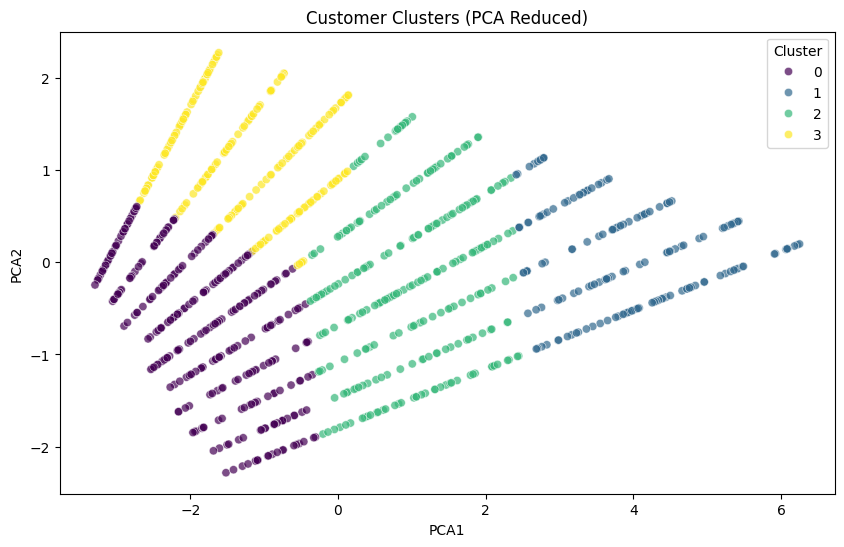

In [ ]:
# Reduce data to 2D using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Add PCA components to DataFrame
df["PCA1"] = df_pca[:, 0]
df["PCA2"] = df_pca[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="viridis", alpha=0.7)
plt.title("Customer Clusters (PCA Reduced)")
plt.show()


In [ ]:
QUESTION 4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target  # Labels (Setosa, Versicolor, Virginica)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Dataset loaded and split!")


✅ Dataset loaded and split!


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


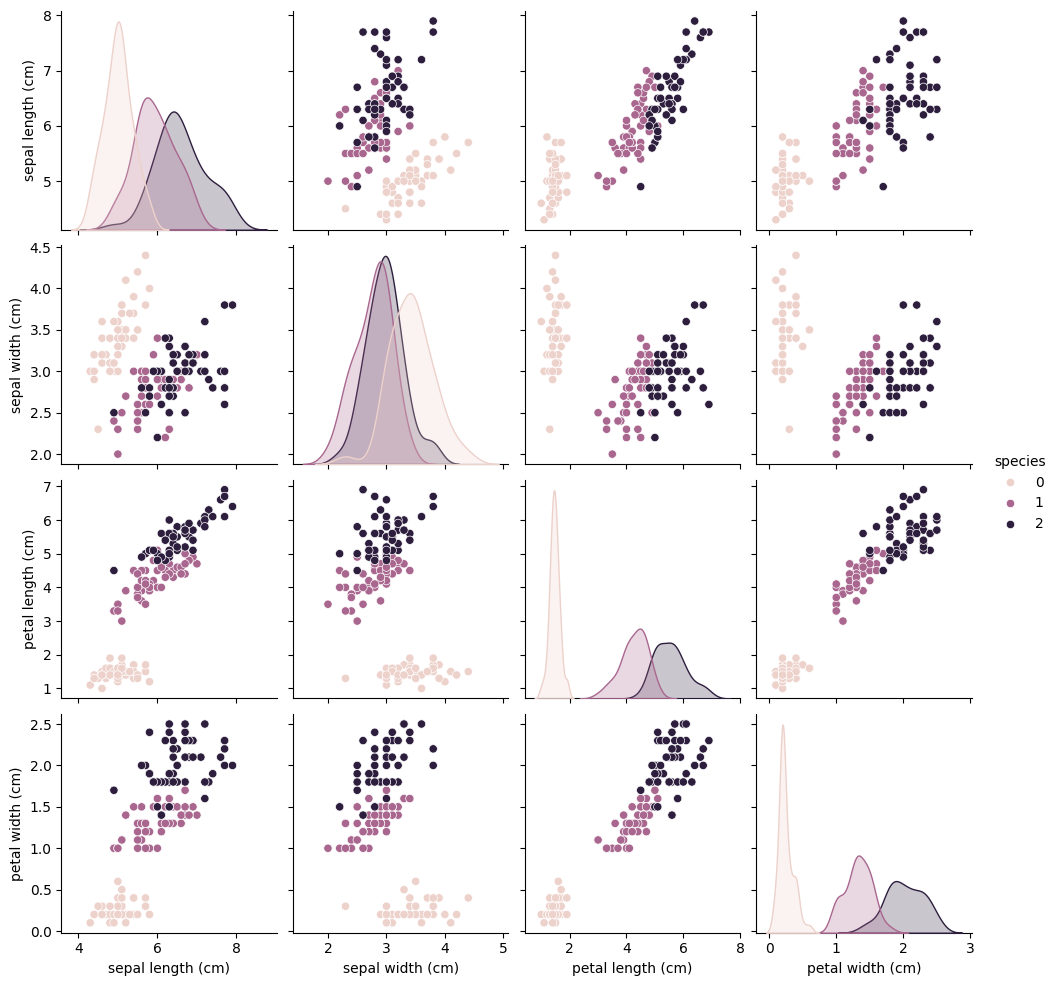

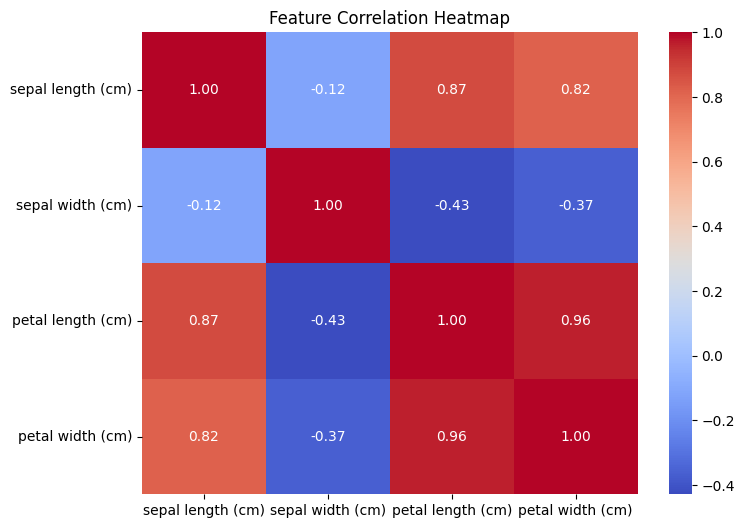

In [ ]:
# Summary statistics
print(X.describe())

# Pairplot to visualize relationships between features
sns.pairplot(pd.concat([X, pd.DataFrame(y, columns=['species'])], axis=1), hue="species")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
#Univariate Feature Selection

selector = SelectKBest(score_func=f_classif, k=2)  # Select top 2 features
X_new = selector.fit_transform(X_train, y_train)

# Print selected features
selected_features = X.columns[selector.get_support()]
print(f"Selected Features (Univariate Selection): {selected_features.tolist()}")


Selected Features (Univariate Selection): ['petal length (cm)', 'petal width (cm)']
